# 1. Read csv file

In [1]:
import pandas as pd

# خواندن فایل CSV و ذخیره در df
df = pd.read_csv("D:/FILES/amazon_reviews.csv")

# نمایش چند سطر اول برای بررسی داده‌ها
print(df[['reviewText', 'overall']].head(5))


                                          reviewText  overall
0                                         No issues.        4
1  Purchased this for my device, it worked as adv...        5
2  it works as expected. I should have sprung for...        4
3  This think has worked out great.Had a diff. br...        5
4  Bought it with Retail Packaging, arrived legit...        5


## Investigating Data

   overall  Count
2      1.0    244
4      2.0     80
3      3.0    142
1      4.0    527
0      5.0   3922


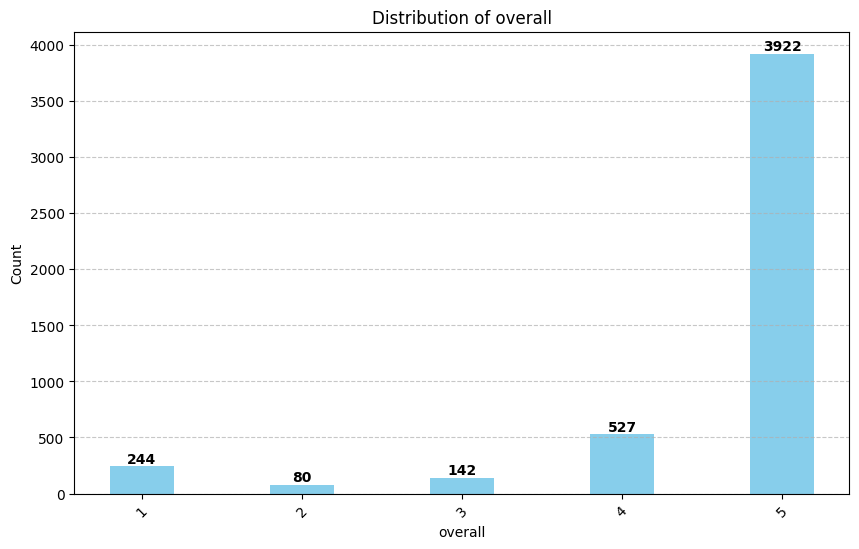

In [27]:
import matplotlib.pyplot as plt

# شمارش تعداد تکرار هر مقدار در ستون 'Rating' و مرتب‌سازی بر اساس مقدار Rating
rating_counts = df['overall'].value_counts().reset_index()
rating_counts.columns = ['overall', 'Count']

# تبدیل 'Rating' به عدد برای مرتب‌سازی صحیح
rating_counts['overall'] = rating_counts['overall'].astype(float)

# مرتب‌سازی بر اساس مقدار Rating
rating_counts = rating_counts.sort_values(by='overall')

# نمایش جدول تعداد تکرارها
print(rating_counts)

# رسم نمودار ستونی
plt.figure(figsize=(10, 6))
bars = plt.bar(rating_counts['overall'], rating_counts['Count'], color='skyblue', width=0.4)

# اضافه کردن مقدار تعداد بالای هر ستون
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=10, fontweight='bold')

# تنظیمات نمودار
plt.xlabel('overall')
plt.ylabel('Count')
plt.title('Distribution of overall')
plt.xticks(rotation=45)  # چرخش برچسب‌های محور افقی برای خوانایی بهتر
plt.grid(axis='y', linestyle='--', alpha=0.7)

# نمایش نمودار
plt.show()

## Data Augmentation

In [2]:
from imblearn.over_sampling import RandomOverSampler
import pandas as pd

# جدا کردن ویژگی‌ها (X) و متغیر هدف (y)
X = df.drop(columns=['overall'])  # حذف ستون overall از ویژگی‌ها
y = df['overall']  # ذخیره کردن ستون overall به عنوان متغیر هدف

# اعمال Oversampling برای متوازن‌سازی داده‌ها
oversample = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = oversample.fit_resample(X, y)

# جایگزینی df با داده‌های جدید
df = pd.concat([X_resampled, y_resampled], axis=1)

# نمایش توزیع جدید
print(df['overall'].value_counts())


4    3922
5    3922
3    3922
1    3922
2    3922
Name: overall, dtype: int64


## Show Balanced Data

   overall  Count
3      1.0   3922
4      2.0   3922
2      3.0   3922
0      4.0   3922
1      5.0   3922


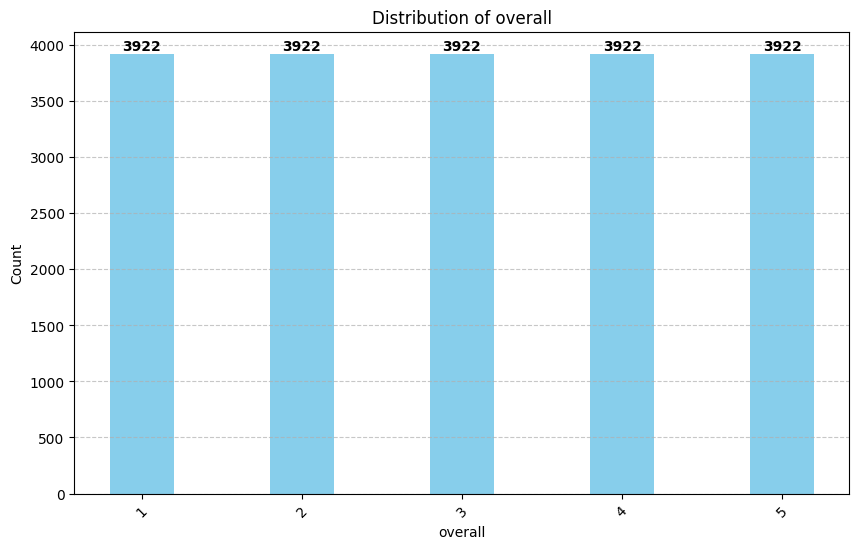

In [29]:
# شمارش تعداد تکرار هر مقدار در ستون 'Rating' و مرتب‌سازی بر اساس مقدار Rating
rating_counts = df['overall'].value_counts().reset_index()
rating_counts.columns = ['overall', 'Count']

# تبدیل 'Rating' به عدد برای مرتب‌سازی صحیح
rating_counts['overall'] = rating_counts['overall'].astype(float)

# مرتب‌سازی بر اساس مقدار Rating
rating_counts = rating_counts.sort_values(by='overall')

# نمایش جدول تعداد تکرارها
print(rating_counts)

# رسم نمودار ستونی
plt.figure(figsize=(10, 6))
bars = plt.bar(rating_counts['overall'], rating_counts['Count'], color='skyblue', width=0.4)

# اضافه کردن مقدار تعداد بالای هر ستون
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=10, fontweight='bold')

# تنظیمات نمودار
plt.xlabel('overall')
plt.ylabel('Count')
plt.title('Distribution of overall')
plt.xticks(rotation=45)  # چرخش برچسب‌های محور افقی برای خوانایی بهتر
plt.grid(axis='y', linestyle='--', alpha=0.7)

# نمایش نمودار
plt.show()

## Add reviewText

In [3]:
# Negative Text

# جملات مربوط به rating های 1 تا 2
content_updates = [
    "The product quality was very poor, totally disappointed.",
    "The item I received was different from the picture. Not happy at all.",
    "Not worth the money, I wouldn’t recommend this product.",
    "Stopped working after a few uses. Very low quality."
]

# تابع برای آپدیت کردن محتوا
def update_content(row):
    if row['overall'] <= 2 and pd.isna(row['reviewText']):
        # انتخاب یکی از جملات به صورت تصادفی
        return content_updates[row.name % len(content_updates)]  # row.name برای انتخاب تصادفی
    return row['reviewText']  # اگر rating بیشتر از 4 باشد، همان محتوا باقی می‌ماند

# اعمال تابع به ستون 'content'
df['reviewText'] = df.apply(update_content, axis=1)

# فیلتر کردن سطرهایی که rating آنها بین 1 تا 4 است
filtered_df = df[(df['overall'] >= 1) & (df['overall'] <= 2)]

# نمایش سطرهای فیلتر شده
print(filtered_df[['overall', 'reviewText']].head())


     overall                                         reviewText
32         1  I bought 2 of those SanDisk 32 GB microSD , us...
38         1  I bougth this micro SD card after some trubles...
43         1  Ordered this for a Galaxy S3.  Lasted a few mo...
49         2  I used this for a few months in my phone, then...
108        2  It works but the actual R/W speeds are 18/8 MB...


In [4]:
# Neutral Text

# جملات مربوط به rating های 3
content_updates = [
    "The product was okay, not great but acceptable.",
    "Average quality, nothing special but does the job.",
    "For the price, it’s fine but don’t expect too much.",
    "I expected better quality, but it’s not bad overall."
]

# تابع برای آپدیت کردن محتوا
def update_content(row):
    if row['overall'] == 3 and pd.isna(row['reviewText']):
        # انتخاب یکی از جملات به صورت تصادفی
        return content_updates[row.name % len(content_updates)]  # row.name برای انتخاب تصادفی
    return row['reviewText']  # اگر rating بیشتر از 4 باشد، همان محتوا باقی می‌ماند

# اعمال تابع به ستون 'content'
df['reviewText'] = df.apply(update_content, axis=1)

# فیلتر کردن سطرهایی که rating 3 است
filtered_df = df[(df['overall'] == 3)]

# نمایش سطرهای فیلتر شده
print(filtered_df[['overall', 'reviewText']].head())


     overall                                         reviewText
11         3  It works, but file writes are a bit slower tha...
64         3  This card advertises itself as UHS1 but it's a...
112        3  Does it's job and fairly cheap for what it's w...
122        3  Still don't feel is very fast or is just my ph...
163        3  Worked great in my galaxy s4--until it didn't ...


## Adding Labels

In [5]:
# اضافه کردن ستون 'label' بر اساس مقدار 'Rating'
df['label'] = pd.cut(df['overall'], 
                               bins=[0, 2, 3, 5], 
                               labels=['negative', 'neutral', 'positive'], 
                               right=True)

# نمایش نتایج
print(df[['reviewText', 'overall', 'label']].head(5))

                                          reviewText  overall     label
0                                         No issues.        4  positive
1  Purchased this for my device, it worked as adv...        5  positive
2  it works as expected. I should have sprung for...        4  positive
3  This think has worked out great.Had a diff. br...        5  positive
4  Bought it with Retail Packaging, arrived legit...        5  positive


# 2. Preprocessing
## Text Cleaning

In [6]:
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# تابع برای حذف نویز (عددها، علائم نگارشی و فاصله‌های اضافی)
def clean_text(text):
    if isinstance(text, str):  # بررسی اینکه آیا ورودی از نوع رشته است
        # حذف عددها
        text = re.sub(r'\d+', '', text)
        # حذف علائم نگارشی
        text = re.sub(r'[^\w\s]', '', text)
        # حذف فاصله‌های اضافی
        text = re.sub(r'\s+', ' ', text).strip()
        # تبدیل متن به حروف کوچک
        text = text.lower()
        # حذف کلمات زائد (Stopwords)
        text = ' '.join([word for word in text.split() if word not in ENGLISH_STOP_WORDS])
    return text

# اعمال پاکسازی بر روی ستون 'Content'
df['reviewText'] = df['reviewText'].apply(clean_text)

# نمایش دیتافریم بعد از اعمال تغییرات
print(df[['reviewText', 'overall', 'label']].head(5))


                                          reviewText  overall     label
0                                             issues        4  positive
1  purchased device worked advertised phone memor...        5  positive
2  works expected sprung higher capacity think bi...        4  positive
3  think worked greathad diff bran gb card went s...        5  positive
4  bought retail packaging arrived legit orange e...        5  positive


## Tokenize

In [7]:
import nltk
from nltk.tokenize import word_tokenize

# بارگذاری منابع لازم برای tokenization
nltk.download('punkt')

# تابع برای اعمال tokenization بر روی متن
def tokenize_text(text):
    if isinstance(text, str):  # بررسی اینکه آیا ورودی از نوع رشته است
        tokens = word_tokenize(text)  # انجام tokenization
        return tokens
    return []

# اعمال tokenization بر روی ستون 'Content'
df['review_Tokens'] = df['reviewText'].apply(tokenize_text)

# نمایش دیتافریم بعد از اعمال tokenization
print(df[['reviewText', 'review_Tokens']].head())


[nltk_data] Downloading package punkt to C:\Users\AFERI/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                          reviewText  \
0                                             issues   
1  purchased device worked advertised phone memor...   
2  works expected sprung higher capacity think bi...   
3  think worked greathad diff bran gb card went s...   
4  bought retail packaging arrived legit orange e...   

                                       review_Tokens  
0                                           [issues]  
1  [purchased, device, worked, advertised, phone,...  
2  [works, expected, sprung, higher, capacity, th...  
3  [think, worked, greathad, diff, bran, gb, card...  
4  [bought, retail, packaging, arrived, legit, or...  


## n-grams

In [8]:
from nltk.util import ngrams

# تابع برای تشکیل n-gram
def generate_ngrams(tokens, n):
    return list(ngrams(tokens, n))

# اعمال Uni-gram (n=1) و Bi-gram (n=2) بر روی ستون 'Content_Tokens'
df['Uni-grams'] = df['review_Tokens'].apply(lambda tokens: generate_ngrams(tokens, 1))  # Uni-gram
df['Bi-grams'] = df['review_Tokens'].apply(lambda tokens: generate_ngrams(tokens, 2))  # Bi-gram

# نمایش دیتافریم بعد از اعمال n-grams
print(df[['review_Tokens', 'Uni-grams', 'Bi-grams']].head())


                                       review_Tokens  \
0                                           [issues]   
1  [purchased, device, worked, advertised, phone,...   
2  [works, expected, sprung, higher, capacity, th...   
3  [think, worked, greathad, diff, bran, gb, card...   
4  [bought, retail, packaging, arrived, legit, or...   

                                           Uni-grams  \
0                                        [(issues,)]   
1  [(purchased,), (device,), (worked,), (advertis...   
2  [(works,), (expected,), (sprung,), (higher,), ...   
3  [(think,), (worked,), (greathad,), (diff,), (b...   
4  [(bought,), (retail,), (packaging,), (arrived,...   

                                            Bi-grams  
0                                                 []  
1  [(purchased, device), (device, worked), (worke...  
2  [(works, expected), (expected, sprung), (sprun...  
3  [(think, worked), (worked, greathad), (greatha...  
4  [(bought, retail), (retail, packaging), (packa..

# 3. Sentiment Analysis

## VADAR Using Content

VADAR

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\AFERI/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                          reviewText  Positive_Score  \
0                                             issues           0.000   
1  purchased device worked advertised phone memor...           0.000   
2  works expected sprung higher capacity think bi...           0.184   
3  think worked greathad diff bran gb card went s...           0.122   
4  bought retail packaging arrived legit orange e...           0.247   

   Negative_Score  Neutral_Score  Compound_Score  
0             0.0          1.000          0.0000  
1             0.0          1.000          0.0000  
2             0.0          0.816          0.4019  
3             0.0          0.878          0.4939  
4             0.0          0.753          0.8591  
                                          reviewText  Positive_Score  \
0                                             issues           0.000   
1  purchased device worked advertised phone memor...           0.000   
2  works expected sprung higher capacity thin

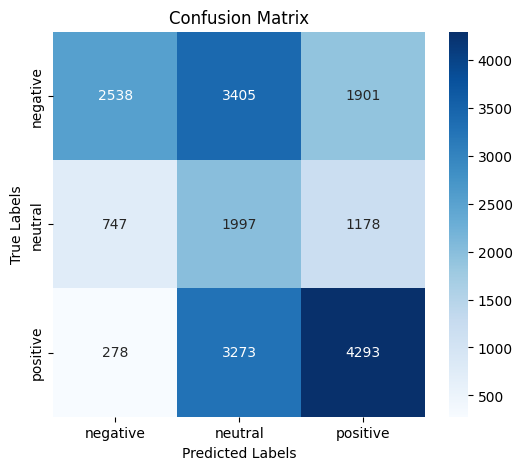

In [36]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
from rich.console import Console

console = Console()
console.print("[bold red]VADAR[/bold red]")

# بارگذاری مدل VADER
nltk.download('vader_lexicon')

# ایجاد یک شیء از SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# تابع برای انجام تحلیل احساس
def analyze_sentiment(text):
    if isinstance(text, str):
        # تحلیل احساس متن با استفاده از VADER
        sentiment_score = sia.polarity_scores(text)
        return sentiment_score
    return {}

# اعمال تحلیل احساس بر روی ستون 'Content'
df['Sentiment'] = df['reviewText'].apply(analyze_sentiment)

# استخراج نمرات مثبت، منفی و خنثی از نتایج تحلیل
df['Positive_Score'] = df['Sentiment'].apply(lambda x: x.get('pos', 0))
df['Negative_Score'] = df['Sentiment'].apply(lambda x: x.get('neg', 0))
df['Neutral_Score'] = df['Sentiment'].apply(lambda x: x.get('neu', 0))
df['Compound_Score'] = df['Sentiment'].apply(lambda x: x.get('compound', 0))

# نمایش دیتافریم بعد از تحلیل احساس
print(df[['reviewText', 'Positive_Score', 'Negative_Score', 'Neutral_Score', 'Compound_Score']].head())

# اضافه کردن ستون 'VADER_SentimentAnalysis' بر اساس مقدار 'Compound_Score'
def get_vader_sentiment_analysis(compound_score):
    if compound_score < -0.5:
        return 'negative'
    elif compound_score > 0.5:
        return 'positive'
    else:
        return 'neutral'

df['VADER_SentimentAnalysis'] = df['Compound_Score'].apply(get_vader_sentiment_analysis)

# نمایش دیتافریم بعد از تحلیل احساس
print(df[['reviewText', 'Positive_Score', 'Negative_Score', 'Neutral_Score', 'Compound_Score', 'VADER_SentimentAnalysis']].head())

#  تعریف کلاس‌ها
labels = ['negative', 'neutral', 'positive']

# محاسبه معیارهای ارزیابی مدل
accuracy = accuracy_score(df['label'], df['VADER_SentimentAnalysis'])
recall = recall_score(df['label'], df['VADER_SentimentAnalysis'], average='weighted')
f1 = f1_score(df['label'], df['VADER_SentimentAnalysis'], average='weighted')

#  نمایش معیارها در قالب جدول
print("\n **Performance Metrics:**")
print(f"{'Metric':<12}{'Value':>8}")
print(f"{'-'*22}")
print(f"{'Accuracy':<12}{accuracy:.2f}")
print(f"{'Recall':<12}{recall:.2f}")
print(f"{'F1-Score':<12}{f1:.2f}")

#  محاسبه و نمایش ماتریس سردرگمی
conf_matrix = confusion_matrix(df['label'], df['VADER_SentimentAnalysis'], labels=labels)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## TextBlob

TextBlob

                                          reviewText  Polarity_Score_TextBlob  \
0                                             issues                 0.000000   
1  purchased device worked advertised phone memor...                 0.000000   
2  works expected sprung higher capacity think bi...                 0.129167   
3  think worked greathad diff bran gb card went s...                 0.250000   
4  bought retail packaging arrived legit orange e...                 0.386667   

   Subjectivity_Score_TextBlob textblob_SentimentAnalysis  
0                        0.000                    neutral  
1                        0.000                    neutral  
2                        0.525                   positive  
3                        1.000                   positive  
4                        0.360                   positive  
Accuracy: 0.44
Recall: 0.44
F1-score: 0.42


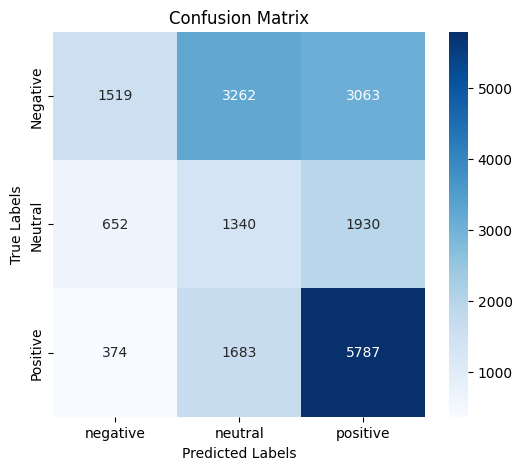

In [37]:
from textblob import TextBlob
from rich.console import Console

console = Console()
console.print("[bold red]TextBlob[/bold red]")

# تابع برای انجام تحلیل احساس با TextBlob
def analyze_sentiment_textblob(text):
    if isinstance(text, str):
        # ایجاد یک شیء TextBlob برای تحلیل احساس
        blob = TextBlob(text)
        # محاسبه نمرات polarity و subjectivity
        return {'Polarity': blob.sentiment.polarity, 'Subjectivity': blob.sentiment.subjectivity}
    return {'Polarity': 0, 'Subjectivity': 0}

# اعمال تحلیل احساس با TextBlob بر روی ستون 'Content'
df['Sentiment_TextBlob'] = df['reviewText'].apply(analyze_sentiment_textblob)

# استخراج نمرات Polarity و Subjectivity از نتایج تحلیل
df['Polarity_Score_TextBlob'] = df['Sentiment_TextBlob'].apply(lambda x: x.get('Polarity', 0))
df['Subjectivity_Score_TextBlob'] = df['Sentiment_TextBlob'].apply(lambda x: x.get('Subjectivity', 0))

# اضافه کردن ستون 'textblob_SentimentAnalysis' بر اساس مقدار 'Polarity_Score_TextBlob'
def get_textblob_sentiment_analysis(polarity_score):
    if polarity_score > 0.1:
        return 'positive'
    elif polarity_score < -0.1:
        return 'negative'
    else:
        return 'neutral'

df['textblob_SentimentAnalysis'] = df['Polarity_Score_TextBlob'].apply(get_textblob_sentiment_analysis)

# نمایش دیتافریم بعد از تحلیل احساس با TextBlob
print(df[['reviewText', 'Polarity_Score_TextBlob', 'Subjectivity_Score_TextBlob', 'textblob_SentimentAnalysis']].head())

# محاسبه دقت (Accuracy)
accuracy = accuracy_score(df['label'], df['textblob_SentimentAnalysis'])

# محاسبه Recall
recall = recall_score(df['label'], df['textblob_SentimentAnalysis'], average='weighted')

# محاسبه F1-score
f1 = f1_score(df['label'], df['textblob_SentimentAnalysis'], average='weighted')

# چاپ نتایج ارزیابی
print(f"Accuracy: {accuracy:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

# محاسبه ماتریس سردرگمی
conf_matrix = confusion_matrix(df['label'], df['textblob_SentimentAnalysis'])

# رسم ماتریس سردرگمی
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=['negative', 'neutral', 'positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## Logistic Regression 

Logistic Regression

Accuracy: 1.00
Recall: 1.00
F1-score: 1.00


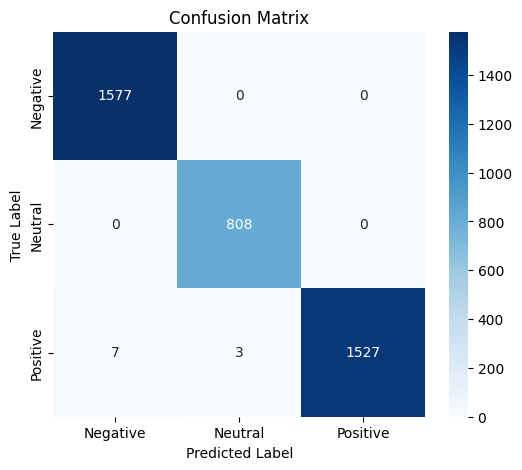

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from rich.console import Console

# اطمینان از عدم وجود مقادیر None یا NaN در ستون 'Content'
df['reviewText'] = df['reviewText'].fillna('')

# استخراج Uni-gram و Bi-gram با استفاده از CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1, 2))  # Uni-gram (1) و Bi-gram (2)

# استفاده از Uni-gram و Bi-gram 
X = df[['Uni-grams', 'Bi-grams']]

# تبدیل متن‌ها به ویژگی‌های عددی
X = vectorizer.fit_transform(df['reviewText'])

# هدف (Sentiment_Class) از قبل ایجاد شده است
y = df['label']

# تقسیم داده‌ها به داده‌های آموزشی و آزمایشی
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ساخت مدل رگرسیون لجیستیک
model = LogisticRegression()

# آموزش مدل
model.fit(X_train, y_train)

# پیش‌بینی بر روی داده‌های آزمایشی
y_pred = model.predict(X_test)

# ارزیابی مدل
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

console = Console()
console.print("[bold red]Logistic Regression[/bold red]")

# چاپ نتایج ارزیابی
print(f"Accuracy: {accuracy:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

# نمایش ماتریس سردرگمی
conf_matrix = confusion_matrix(y_test, y_pred)

# ترسیم ماتریس سردرگمی
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


## Random Forest

Random Forest

Accuracy: 1.00
Recall: 1.00
F1-score: 1.00


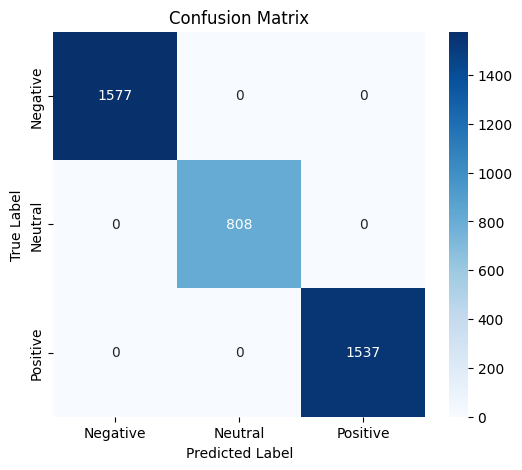

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# اطمینان از عدم وجود مقادیر None یا NaN در ستون 'Content'
df['reviewText'] = df['reviewText'].fillna('')

# استفاده از Uni-gram و Bi-gram 
X = df[['Uni-grams', 'Bi-grams']]

# تبدیل متن‌ها به ویژگی‌های عددی
X = vectorizer.fit_transform(df['reviewText'])

# هدف (Sentiment_Class) از قبل ایجاد شده است
y = df['label']

# تقسیم داده‌ها به داده‌های آموزشی و آزمایشی
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ساخت مدل جنگل تصادفی (Random Forest)
model = RandomForestClassifier(random_state=42)

# آموزش مدل
model.fit(X_train, y_train)

# پیش‌بینی بر روی داده‌های آزمایشی
y_pred = model.predict(X_test)

# ارزیابی مدل
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

console = Console()
console.print("[bold red]Random Forest[/bold red]")

# چاپ نتایج ارزیابی
print(f"Accuracy: {accuracy:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

# نمایش ماتریس سردرگمی
conf_matrix = confusion_matrix(y_test, y_pred)

# ترسیم ماتریس سردرگمی
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


## Naive Bayes

Naive Bayes

Accuracy: 0.99
Recall: 0.99
F1-score: 0.99


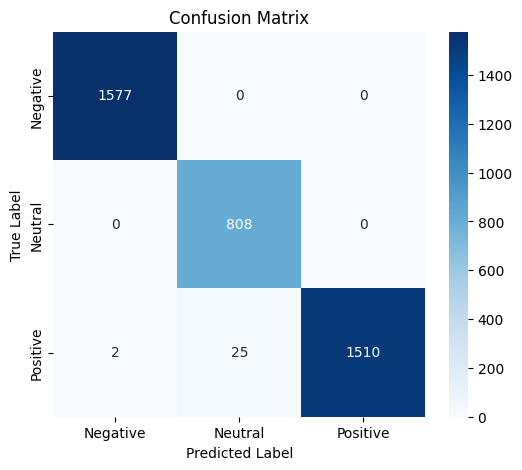

In [40]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# اطمینان از عدم وجود مقادیر None یا NaN در ستون 'Content'
df['reviewText'] = df['reviewText'].fillna('')

# استفاده از Uni-gram و Bi-gram 
X = df[['Uni-grams', 'Bi-grams']]

# تبدیل متن‌ها به ویژگی‌های عددی
X = vectorizer.fit_transform(df['reviewText'])

# هدف (Sentiment_Class) از قبل ایجاد شده است
y = df['label']

# تقسیم داده‌ها به داده‌های آموزشی و آزمایشی
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ساخت مدل Naive Bayes
model = MultinomialNB()

# آموزش مدل
model.fit(X_train, y_train)

# پیش‌بینی بر روی داده‌های آزمایشی
y_pred = model.predict(X_test)

# ارزیابی مدل
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

console = Console()
console.print("[bold red]Naive Bayes[/bold red]")

# چاپ نتایج ارزیابی
print(f"Accuracy: {accuracy:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

# نمایش ماتریس سردرگمی
conf_matrix = confusion_matrix(y_test, y_pred)

# ترسیم ماتریس سردرگمی
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


## Ensemble Methods (VotingClassifier)

Ensemble(KNN, Decision Tree) Methods

Accuracy: 0.98
Recall: 0.98
F1-score: 0.98


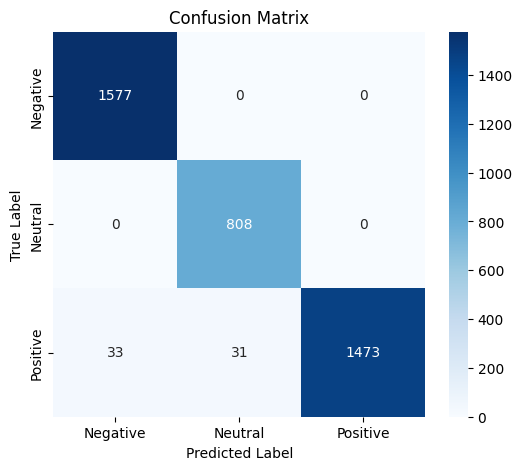

In [41]:
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# اطمینان از عدم وجود مقادیر None یا NaN در ستون 'Content'
df['reviewText'] = df['reviewText'].fillna('')

# استفاده از Uni-gram و Bi-gram 
X = df[['Uni-grams', 'Bi-grams']]

# تبدیل متن‌ها به ویژگی‌های عددی
X = vectorizer.fit_transform(df['reviewText'])

# هدف (Sentiment_Class) از قبل ایجاد شده است
y = df['label']

# تقسیم داده‌ها به داده‌های آموزشی و آزمایشی
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ساخت مدل‌های KNN و Decision Tree
knn_model = KNeighborsClassifier(n_neighbors=3)
dt_model = DecisionTreeClassifier(random_state=42)

# ساخت مدل VotingClassifier که از مدل‌های KNN و Decision Tree استفاده می‌کند
ensemble_model = VotingClassifier(estimators=[('knn', knn_model), ('dt', dt_model)], voting='hard')

# آموزش مدل
ensemble_model.fit(X_train, y_train)

# پیش‌بینی بر روی داده‌های آزمایشی
y_pred = ensemble_model.predict(X_test)

# ارزیابی مدل
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

console = Console()
console.print("[bold red]Ensemble(KNN, Decision Tree) Methods[/bold red]")

# چاپ نتایج ارزیابی
print(f"Accuracy: {accuracy:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

# نمایش ماتریس سردرگمی
conf_matrix = confusion_matrix(y_test, y_pred)

# ترسیم ماتریس سردرگمی
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


## Random Forest using Worc2Vec

[nltk_data] Downloading package punkt to C:\Users\AFERI/nltk_data...
[nltk_data]   Package punkt is already up-to-date!



 **Performance Metrics:**
Metric         Value
----------------------
Accuracy    1.00
Recall      1.00
F1-Score    1.00


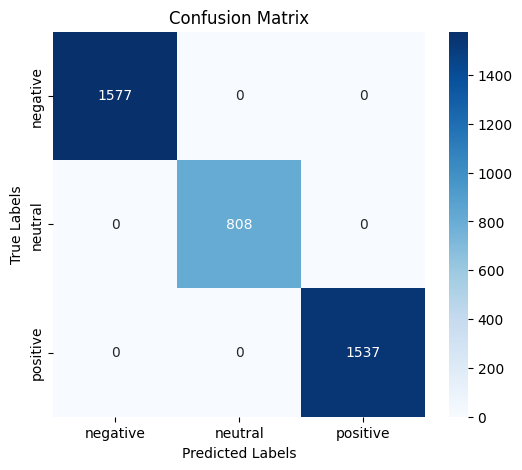

In [11]:
import pandas as pd
import numpy as np
import nltk
import gensim
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# دانلود منابع مورد نیاز NLTK
nltk.download('punkt')

# --- 1. پیش‌پردازش داده‌ها ---
def preprocess_text(text):
    if isinstance(text, str):  # بررسی نوع داده برای جلوگیری از خطا
        tokens = word_tokenize(text.lower())  # تبدیل به حروف کوچک و توکنایز کردن
        return tokens
    return []

df['tokens'] = df['reviewText'].fillna('').apply(preprocess_text)

# --- 2. آموزش مدل Word2Vec ---
word2vec_model = Word2Vec(sentences=df['tokens'], vector_size=100, window=5, min_count=1, workers=4)

# --- 3. تبدیل متن به بردارهای Word2Vec ---
def get_sentence_vector(tokens, model):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

df['vector'] = df['tokens'].apply(lambda x: get_sentence_vector(x, word2vec_model))

# --- 4. آماده‌سازی داده‌ها برای مدل یادگیری ماشین ---
X = np.vstack(df['vector'].values)  # ماتریس ویژگی‌ها
label_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}
y = df['label'].map(label_mapping)

# تقسیم داده‌ها به مجموعه‌های آموزشی و تستی
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 5. آموزش مدل طبقه‌بندی (Random Forest) ---
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# --- 6. پیش‌بینی و ارزیابی مدل ---
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# نمایش معیارها در قالب جدول
print("\n **Performance Metrics:**")
print(f"{'Metric':<12}{'Value':>8}")
print(f"{'-'*22}")
print(f"{'Accuracy':<12}{accuracy:.2f}")
print(f"{'Recall':<12}{recall:.2f}")
print(f"{'F1-Score':<12}{f1:.2f}")

# --- 7. نمایش ماتریس سردرگمی ---
conf_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1, 2])
labels = ['negative', 'neutral', 'positive']

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


## Textblob using Word2Vec

                                          reviewText  Polarity_Score_TextBlob  \
0                                             issues                 0.000000   
1  purchased device worked advertised phone memor...                 0.000000   
2  works expected sprung higher capacity think bi...                 0.129167   
3  think worked greathad diff bran gb card went s...                 0.250000   
4  bought retail packaging arrived legit orange e...                 0.386667   

   Subjectivity_Score_TextBlob TextBlob_Word2Vec_SentimentAnalysis  
0                        0.000                             neutral  
1                        0.000                             neutral  
2                        0.525                            positive  
3                        1.000                            positive  
4                        0.360                            positive  
Accuracy: 0.44
Recall: 0.44
F1-score: 0.42


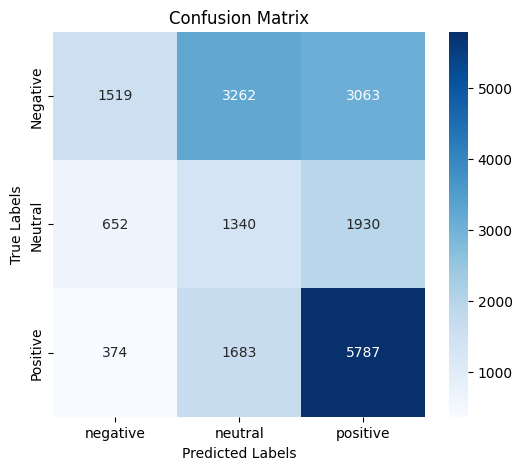

In [14]:
from textblob import TextBlob
from nltk.tokenize import word_tokenize
import numpy as np
import gensim
from gensim.models import Word2Vec
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix

# توکنایز کردن متن‌ها
sentences = df['reviewText'].apply(word_tokenize)

# آموزش مدل Word2Vec
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# تابع برای استخراج میانگین بردارهای کلمات یک جمله
def get_sentence_vector(sentence, model):
    sentence_vector = np.zeros(100)  # فرض می‌کنیم بردارهای کلمات طول 100 دارند
    words = word_tokenize(sentence)
    word_count = 0
    for word in words:
        if word in model.wv:
            sentence_vector += model.wv[word]
            word_count += 1
    if word_count > 0:
        sentence_vector /= word_count  # میانگین بردارهای کلمات جمله
    return sentence_vector

# تابع برای انجام تحلیل احساس با TextBlob
def analyze_sentiment_textblob_with_word2vec(text, model):
    if isinstance(text, str):
        # استخراج بردار معنایی جمله از مدل Word2Vec
        sentence_vector = get_sentence_vector(text, model)
        
        # ایجاد یک شیء TextBlob برای تحلیل احساس
        blob = TextBlob(text)
        # محاسبه نمرات polarity و subjectivity
        sentiment = blob.sentiment
        return {
            'Polarity': sentiment.polarity,
            'Subjectivity': sentiment.subjectivity,
            'Sentence_Vector': sentence_vector
        }
    return {'Polarity': 0, 'Subjectivity': 0, 'Sentence_Vector': np.zeros(100)}

# اعمال تحلیل احساس با TextBlob بر روی ستون 'Content' همراه با Word2Vec
df['Sentiment_TextBlob_Word2Vec'] = df['reviewText'].apply(lambda x: analyze_sentiment_textblob_with_word2vec(x, model))

# استخراج نمرات Polarity و Subjectivity از نتایج تحلیل
df['Polarity_Score_TextBlob'] = df['Sentiment_TextBlob_Word2Vec'].apply(lambda x: x.get('Polarity', 0))
df['Subjectivity_Score_TextBlob'] = df['Sentiment_TextBlob_Word2Vec'].apply(lambda x: x.get('Subjectivity', 0))

# اضافه کردن ستون 'TextBlob_Word2Vec_SentimentAnalysis' بر اساس مقدار 'Polarity_Score_TextBlob'
def get_textblob_sentiment_analysis(polarity_score):
    if polarity_score > 0.1:
        return 'positive'
    elif polarity_score < -0.1:
        return 'negative'
    else:
        return 'neutral'

df['TextBlob_Word2Vec_SentimentAnalysis'] = df['Polarity_Score_TextBlob'].apply(get_textblob_sentiment_analysis)

# نمایش دیتافریم بعد از تحلیل احساس با TextBlob و Word2Vec
print(df[['reviewText', 'Polarity_Score_TextBlob', 'Subjectivity_Score_TextBlob', 'TextBlob_Word2Vec_SentimentAnalysis']].head())

# محاسبه دقت (Accuracy)
accuracy = accuracy_score(df['label'], df['TextBlob_Word2Vec_SentimentAnalysis'])

# محاسبه Recall
recall = recall_score(df['label'], df['TextBlob_Word2Vec_SentimentAnalysis'], average='weighted')

# محاسبه F1-score
f1 = f1_score(df['label'], df['TextBlob_Word2Vec_SentimentAnalysis'], average='weighted')

# چاپ نتایج ارزیابی
print(f"Accuracy: {accuracy:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

# محاسبه ماتریس سردرگمی
conf_matrix = confusion_matrix(df['label'], df['TextBlob_Word2Vec_SentimentAnalysis'])

# رسم ماتریس سردرگمی
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=['negative', 'neutral', 'positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
